# Ноутбук к уроку 6. Оконные функции и интерактивные графики

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

Зададим параметры для визуализации графиков по умолчанию

In [2]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

Прочитаем данные по продажам

In [3]:
sales_team  = pd.read_csv('sales_team.csv')
order_leads = pd.read_csv('order_leads.csv')
invoices    = pd.read_csv('invoices.csv')

Посмотрим на датафрейм с информацией по компаниям, которые занимаются продажами

In [4]:
sales_team.head()

Sales Rep      Sales Rep Id            Company Name        Company Id
0  William Taylor  ZTZA0ZLYZR85PTUJ  Melancholy Social-Role  D0AUXPP07H6AVSGD
1  William Taylor  ZTZA0ZLYZR85PTUJ          Pee-Wee Pigeon  TJW99R4RWH02INII
2  William Taylor  ZTZA0ZLYZR85PTUJ     Vaginal 36-Year-Old  3S20IO1O1DYXMUNU
3  William Taylor  ZTZA0ZLYZR85PTUJ    Unhurried Musician'S  FDWW0TQRPGMVI2A7
4  William Taylor  ZTZA0ZLYZR85PTUJ     Comprehensive Lists  C30FY83UNLVBA0O3

Посмотрим на датафрейм с информацией по заказам

In [5]:
order_leads.head()

Order Id        Company Id            Company Name        Date  \
0  HZSXLI1IS9RGABZW  D0AUXPP07H6AVSGD  Melancholy Social-Role  2017-10-13   
1  582WPS3OW8T6YT0R  D0AUXPP07H6AVSGD  Melancholy Social-Role  2017-09-02   
2  KRF65MQZBOYG4Y9T  D0AUXPP07H6AVSGD  Melancholy Social-Role  2016-12-21   
3  N3EDZ5V1WGSWW828  D0AUXPP07H6AVSGD  Melancholy Social-Role  2018-06-03   
4  QXBC8COXEXGFSPLP  D0AUXPP07H6AVSGD  Melancholy Social-Role  2014-07-26   

   Order Value  Converted  
0         6952          0  
1         7930          0  
2         5538          1  
3         1113          0  
4         4596          0

In [6]:
order_leads.dtypes

Order Id        object
Company Id      object
Company Name    object
Date            object
Order Value      int64
Converted        int64
dtype: object

Переведем колонку `Date` в формат datetime

In [7]:
order_leads['Date'] = pd.to_datetime(order_leads.Date)

Посмотрим, как в зависимости от формата обращения к колонке меняется результат

In [8]:
order_leads[['Date']].shape # используем двойные квадратные скобки и получаем датафрейм

(100000, 1)

In [9]:
order_leads['Date'].shape # используем одинарные квадратные скобки и получаем серию

(100000,)

#### Проанализируем конверсию по дням

Переименуем названия колонок в датафрейме `order_leads`, чтобы с ними было удобно работать

In [10]:
order_leads = order_leads.rename(columns={'Order Id': 'Order_Id',
                                          'Company Id': 'Company_Id',
                                          'Company Name': 'Company_Name',
                                          'Order Value': 'Order_Value'})

Посчитаем CR (процента реализованных сделок) по дням и построим график

In [11]:
cr_by_day = order_leads.groupby(['Date']) \
    .agg({'Converted': 'mean'}) \
    .rename(columns={'Converted': 'CR'}) \
    .sort_values('Date')

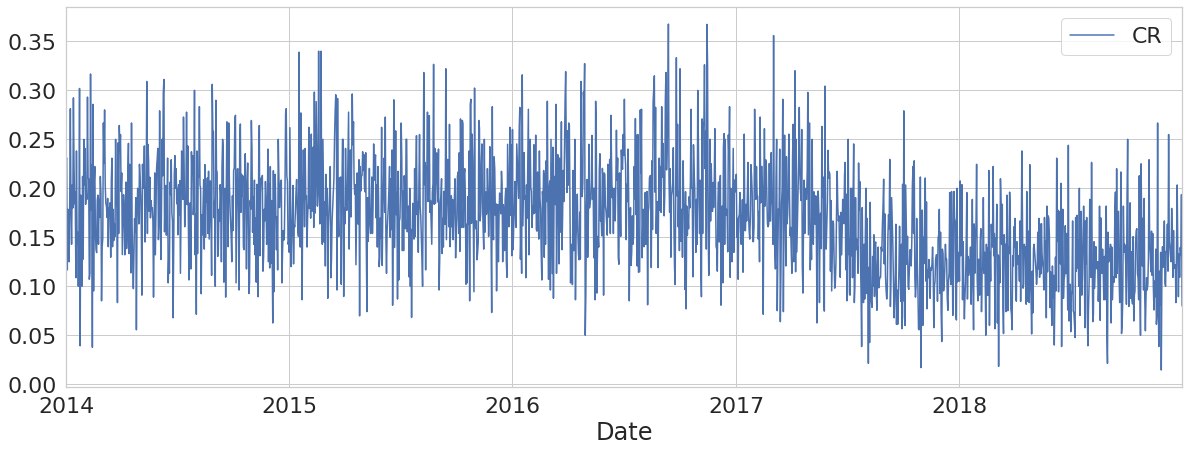

In [12]:
cr_by_day.plot()

Посчитаем скользящее среднее с окном 30 и на его основе построим график скользящего значения CR по дням

In [13]:
cr_by_day_rolling = order_leads.groupby(['Date']) \
    .agg({'Converted': 'mean'}) \
    .rename(columns={'Converted': 'CR'}) \
    .sort_values('Date') \
    .rolling(30).mean()

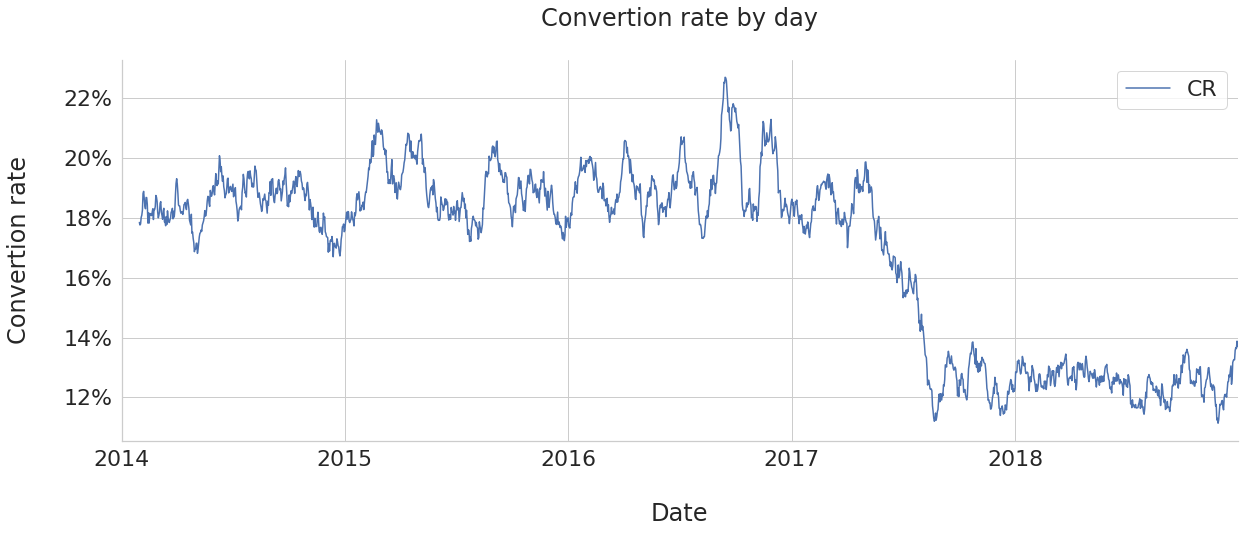

In [14]:
ax = cr_by_day_rolling.plot()
ax.set_title('Convertion rate by day\n') # добавим заголовок графика
ax.set_ylabel('Convertion rate\n') # добавим название оси у
ax.set_xlabel('\nDate') # добавим название оси х
ax.set_yticklabels(['{:.0%}'.format(n) for n in ax.get_yticks()]) # отобразим значения на оси у в %
sns.despine() # уберем часть рамки и аутпуты

Напишем функцию, которая будет строить график с заданным форматированием

In [15]:
def get_plot(df, x_label='', y_label='', title=''):
    ax = df.plot()

    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_yticklabels(['{:.0%}'.format(n) for n in ax.get_yticks()])
    sns.despine()

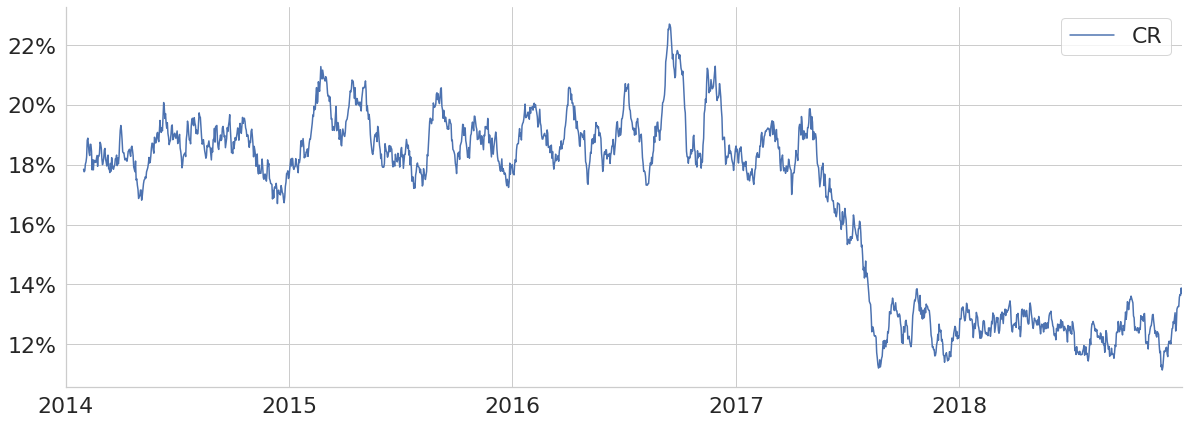

In [16]:
get_plot(cr_by_day_rolling)

Предобработаем датафрейм, сбросив индекс и удалив пропущенные значения

In [17]:
cr_by_day_rolling_ = cr_by_day_rolling.reset_index().dropna()

In [18]:
cr_by_day_rolling_.head()

Date        CR
29 2014-01-30  0.178512
30 2014-01-31  0.177663
31 2014-02-01  0.177996
32 2014-02-02  0.180229
33 2014-02-03  0.180944

С помощью библиотеки `plotly` построим аналогичный график скользящего значения CR по дням

In [19]:
fig = px.line(cr_by_day_rolling_, x="Date", y="CR")
fig.show()

#### Проанализируем средние значения Convertion rate по департаментам продаж

Переименуем названия колонок в датафрейме `sales_team`, чтобы с ними было удобно работать

In [20]:
sales_team = sales_team.rename(columns={'Company Name': 'Company_Name',
                                        'Company Id'  : 'Company_Id',
                                        'Sales Rep'   : 'Sales_Rep',
                                        'Sales_Rep_Id': 'Sales Rep Id'})

Объединим датафреймы с данными о заказах и о компаниях, которые занимаются продажами

In [21]:
order_leads_with_team_data = order_leads.merge(sales_team, how='left', on=['Company_Name', 'Company_Id'])

In [22]:
order_leads_with_team_data.head()

Order_Id        Company_Id            Company_Name       Date  \
0  HZSXLI1IS9RGABZW  D0AUXPP07H6AVSGD  Melancholy Social-Role 2017-10-13   
1  582WPS3OW8T6YT0R  D0AUXPP07H6AVSGD  Melancholy Social-Role 2017-09-02   
2  KRF65MQZBOYG4Y9T  D0AUXPP07H6AVSGD  Melancholy Social-Role 2016-12-21   
3  N3EDZ5V1WGSWW828  D0AUXPP07H6AVSGD  Melancholy Social-Role 2018-06-03   
4  QXBC8COXEXGFSPLP  D0AUXPP07H6AVSGD  Melancholy Social-Role 2014-07-26   

   Order_Value  Converted       Sales_Rep      Sales Rep Id  
0         6952          0  William Taylor  ZTZA0ZLYZR85PTUJ  
1         7930          0  William Taylor  ZTZA0ZLYZR85PTUJ  
2         5538          1  William Taylor  ZTZA0ZLYZR85PTUJ  
3         1113          0  William Taylor  ZTZA0ZLYZR85PTUJ  
4         4596          0  William Taylor  ZTZA0ZLYZR85PTUJ

Посчитаем средний CR у каждого департамента продаж (`Sales_Rep`) и выберем топ-10 департаментов

In [23]:
top_sales = order_leads_with_team_data.groupby(['Sales_Rep'], as_index=False) \
    .agg({'Converted': 'mean'}) \
    .sort_values('Converted') \
    .tail(10)

In [24]:
top_sales

Sales_Rep  Converted
346       Nick Allen   0.298507
192    Jennifer Peck   0.304348
468   Thomas Lindsey   0.304348
187     Jason Miller   0.307692
455       Teddy Cook   0.315789
225      Jose Gaines   0.326087
249  Katie Rodriquez   0.333333
466   Thomas Fortner   0.352941
438    Sierra Garcia   0.363636
151    Ginger Wright   0.368421

Визуализируем эти данные с помощью барплота

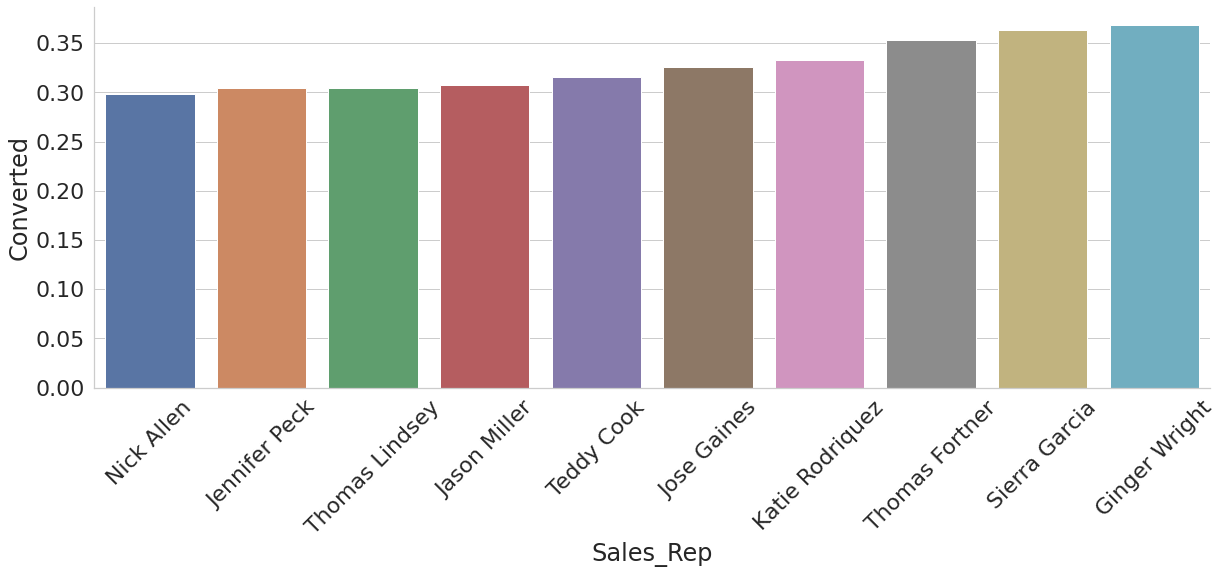

In [25]:
ax = sns.barplot(data=top_sales, y='Converted', x='Sales_Rep')
ax.set_xticklabels(top_sales.Sales_Rep, rotation=45) #развернем значения на оси х под 45 градусов
sns.despine()

Посмотрим, как распределено среднее значение CR у каждого департамента продаж (`Sales_Rep`)

In [26]:
all_sales = order_leads_with_team_data.groupby(['Sales_Rep'], as_index=False) \
    .agg({'Converted': 'mean'}) \
    .sort_values('Converted')

In [27]:
all_sales

Sales_Rep  Converted
383      Richard Nicols   0.055556
188        Jason Rogers   0.076923
224           Jon Adams   0.085714
116      Elijah Valenti   0.094444
36   Beatrice Mccormick   0.095238
..                  ...        ...
225         Jose Gaines   0.326087
249     Katie Rodriquez   0.333333
466      Thomas Fortner   0.352941
438       Sierra Garcia   0.363636
151       Ginger Wright   0.368421

[499 rows x 2 columns]

Построим гистограмму распределения этих значений

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



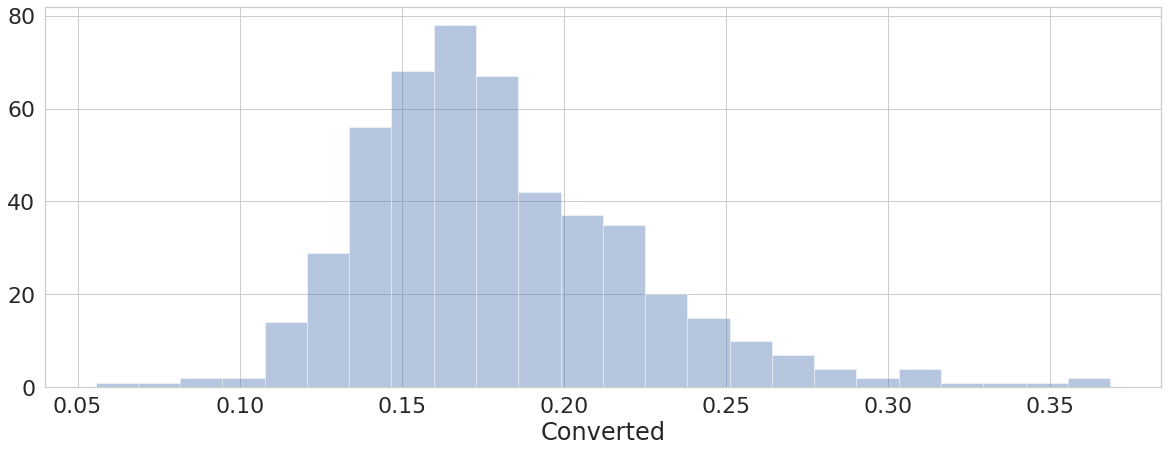

In [28]:
sns.distplot(all_sales.Converted, kde=False)
# предупреждение на красном фоне возникает из-за того, что разработчики seaborn пометили функцию distplot как устаревшую
# но это не ошибка, а лишь предупреждение, и функция работает